<a href="https://colab.research.google.com/github/avneeshdubey99/GRIP-Internship/blob/main/Sol4_GlobalTerrorismAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Avneesh Dubey

#Task 4 - Global Terrorism Analysis

In [11]:
## Importing relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import plotly.express as px

In [12]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [13]:
## Reading the csv file and encoding for unicode decode error

df = pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [14]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [15]:
df.describe # Strategical display of data

<bound method NDFrame.describe of              eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ...       

In [16]:
df.info() # Detailed information about the imported 'df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [17]:
df.shape # Number of rows and columns

(181691, 135)

In [18]:
df.isnull().sum() # Checking for NA values

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [20]:
corr = df.corr()
corr  # Correlation pf the data

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070646,0.002019,0.026215,-0.016789,0.298888,0.041344,0.093720,-0.082972,0.137743,0.074173,0.071982,0.189245,0.079080,0.048798,-0.019084,0.097623,0.111425,-0.082822,0.156170,0.090551,0.039081,0.040647,-0.066449,-0.177867,0.017939,-0.137408,0.428397,0.141600,0.110578,0.033917,0.038996,-0.318032,-0.146094,0.398728,-0.011716,0.101733,0.101045,0.041027,0.081357,0.090000,-0.138596,0.027110,0.015351,-0.013808,0.027579,0.015282,-0.029348,0.027904,-0.278927,-0.150677,-0.013498,-0.010146,0.006369,-0.010082,-0.493414,-0.169859,-0.241986,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211,-0.016784,0.298920,0.041367,0.093736,-0.082963,0.137736,0.074153,0.072177,0.189454,0.079082,0.048794,-0.019068,0.097552,0.111364,-0.082784,0.155939,0.090345,0.038941,0.040656,-0.066417,-0.177591,0.017944,-0.137459,0.428278,0.141486,0.110542,0.034143,0.039172,-0.318815,-0.145529,0.398227,-0.011737,0.101727,0.101036,0.040990,0.081342,0.090267,-0.138298,0.026855,0.015341,-0.013828,0.027563,0.015273,-0.029357,0.027879,-0.278916,-0.150690,-0.013490,-0.010159,0.006342,-0.010093,-0.493378,-0.169931,-0.241764,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012477,-0.011762,-0.004422,-0.002845,0.003071,0.006705,-0.029027,-0.039298,-0.000948,0.001508,-0.004838,0.019584,0.016365,-0.006315,0.059489,0.052698,0.036580,-0.004460,-0.008286,-0.054490,-0.001661,0.014354,0.019890,0.023083,0.013361,-0.040736,-0.040042,0.147710,-0.156620,0.144738,0.007863,0.002142,0.000581,0.009567,-0.020514,-0.086445,-0.062079,0.058090,0.003463,0.003891,0.003462,0.002938,0.001467,0.005091,-0.005816,0.001027,-0.003279,0.003397,0.011226,0.003746,-0.015730,0.002131,-0.070199,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.007817,-0.000395,-0.011802,0.003593,-0.005333,0.014498,-0.080422,-0.000052,-0.003184,0.003845,0.008964,0.011289,-0.017420,-0.056251,-0.044442,-0.018528,-0.002186,0.041395,-0.039794,-0.003788,-0.013527,0.003300,0.004474,0.003635,-0.031937,0.029723,0.149860,0.106259,0.029735,-0.003019,0.006182,0.017279,-0.005912,0.043226,-0.000417,-0.005110,0.073744,-0.003693,-0.001987,-0.002012,-0.001268,0.001392,0.001812,-0.003903,-0.012729,-0.001093,0.004077,-0.020800,-0.002318,-0.036193,0.019856,0.001206,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249,0.048533,0.011638,0.096563,-0.013440,0.073233,-0.033961,0.272272,-0.035143,-0.040606,0.011613,0.022996,0.013609,-0.031271,-0.014091,0.040233,0.032853,0.035114,0.014293,0.033464,-0.056545,-0.030

## DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ff1484c88>,
      dtype=object)

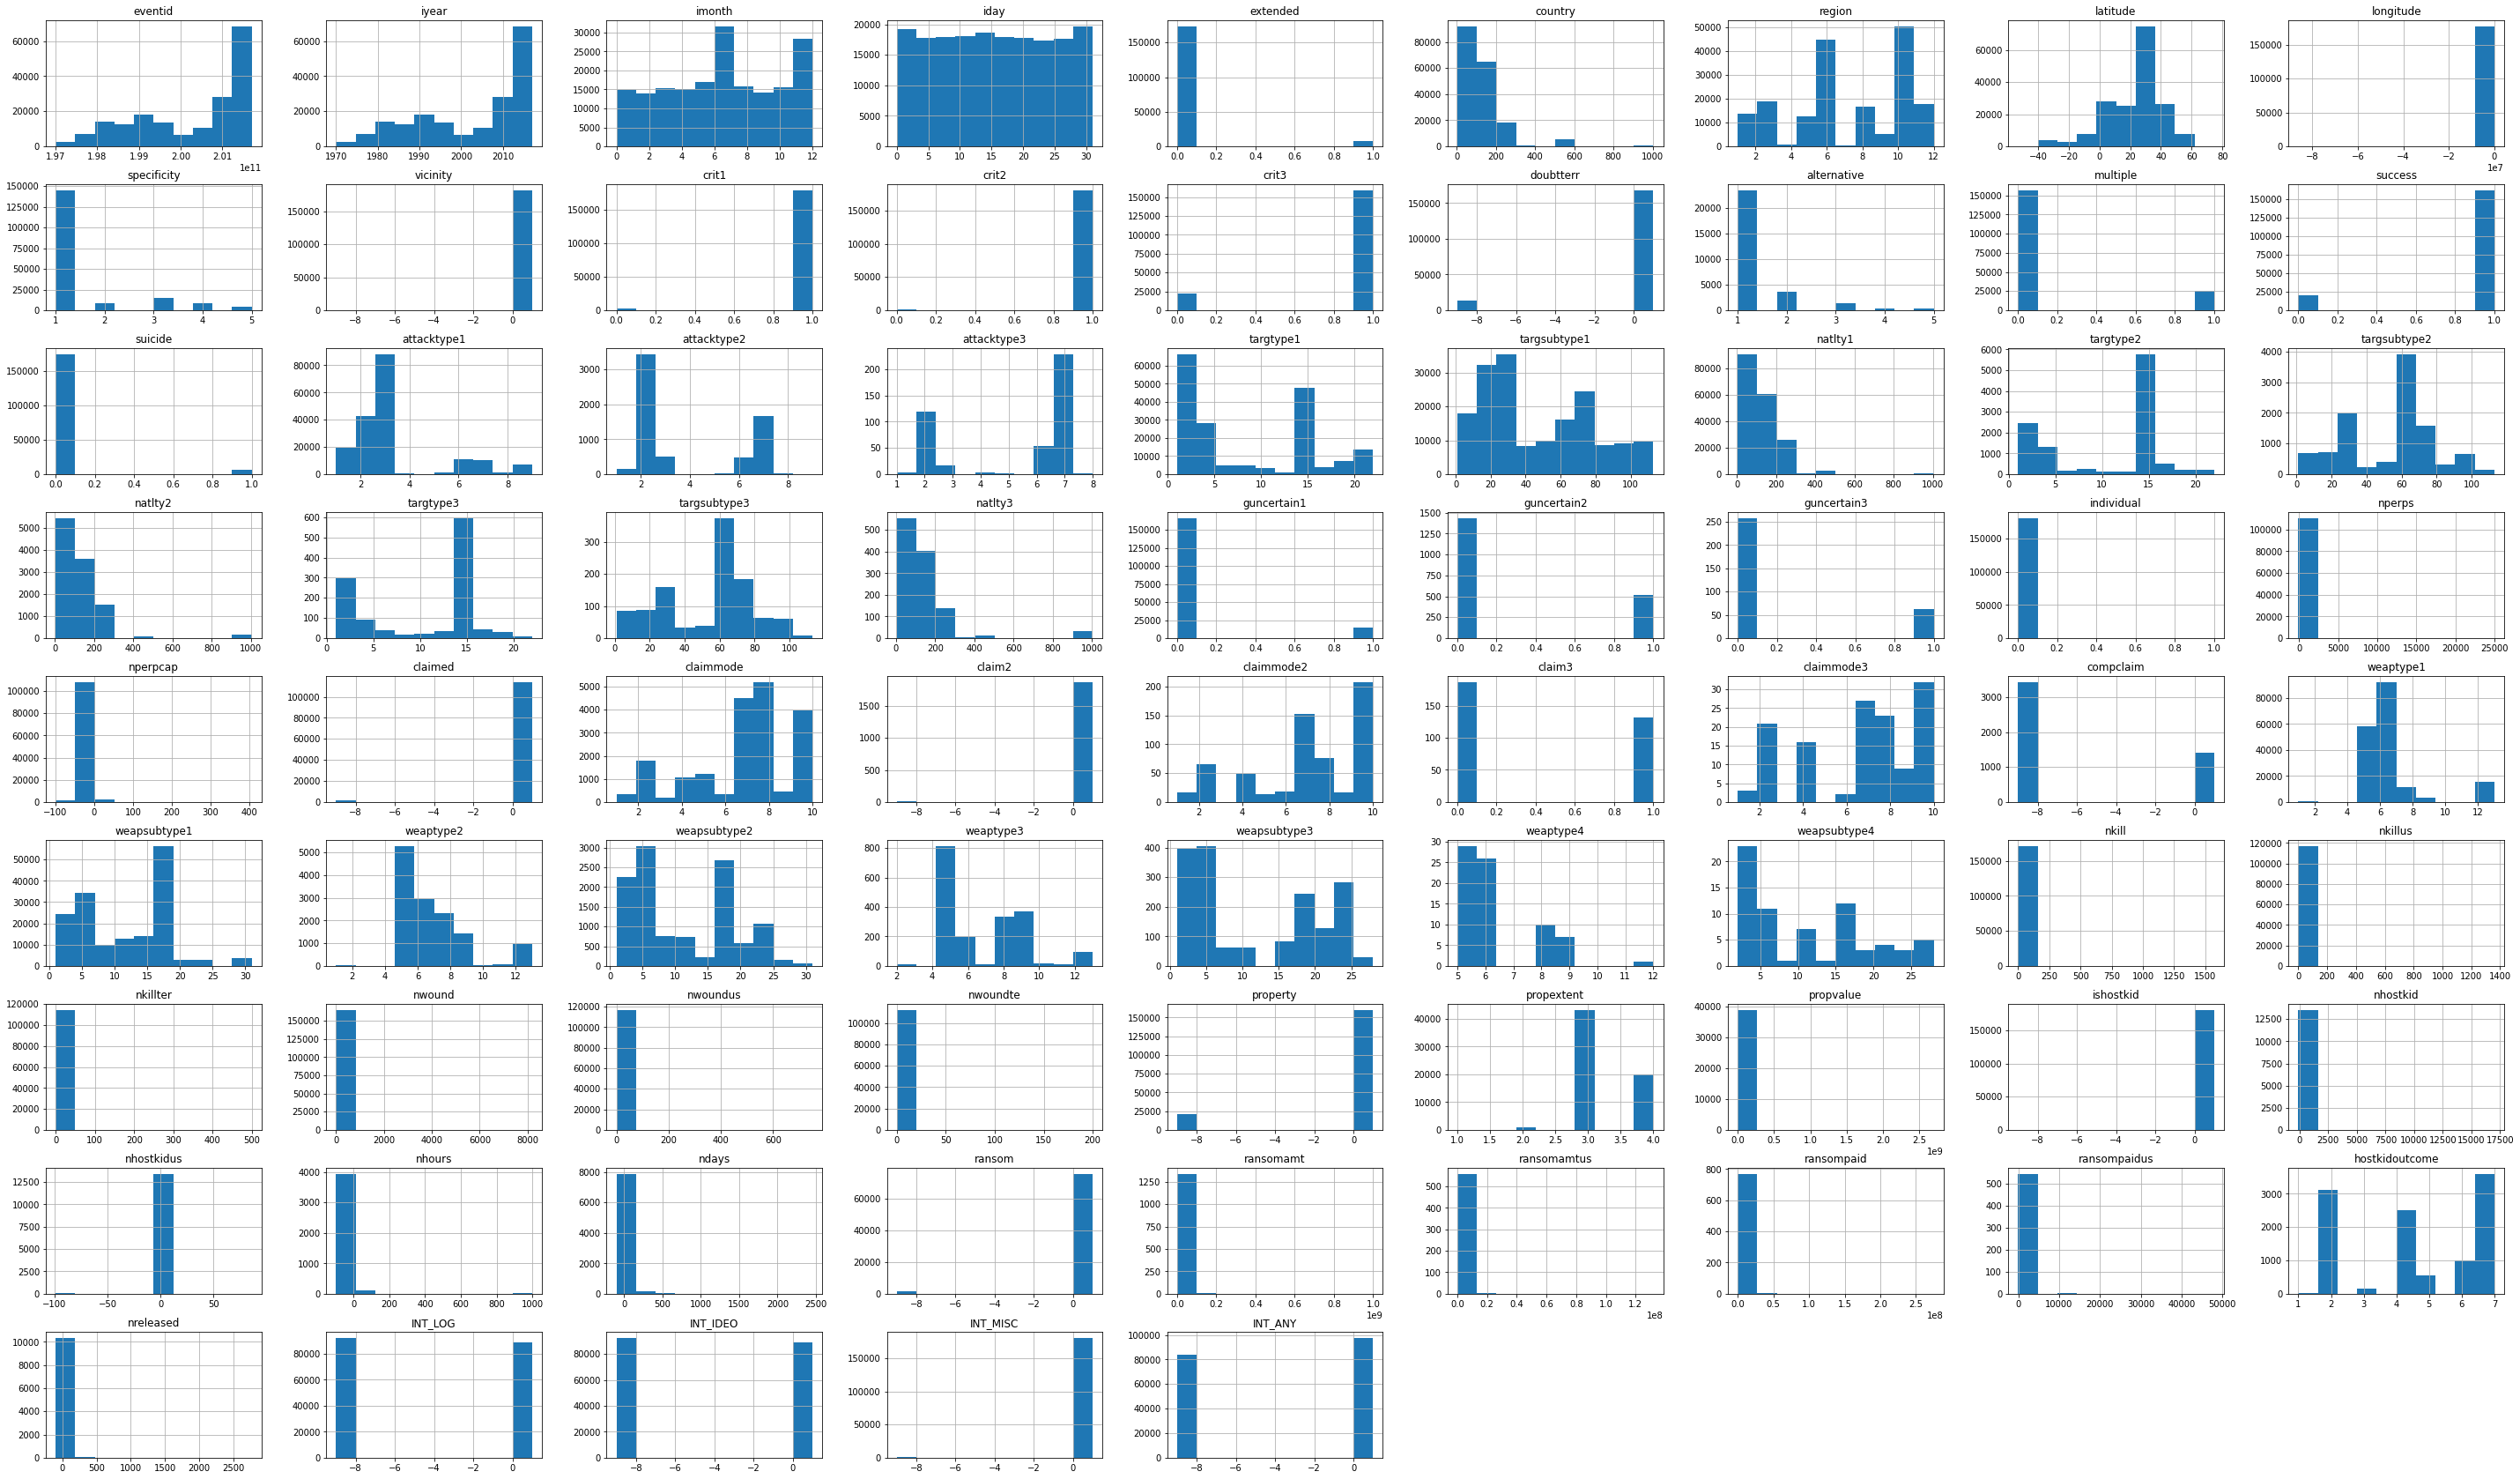

In [21]:
df.hist(figsize=(50,30))

Checking which region has highest attacks and in which year.

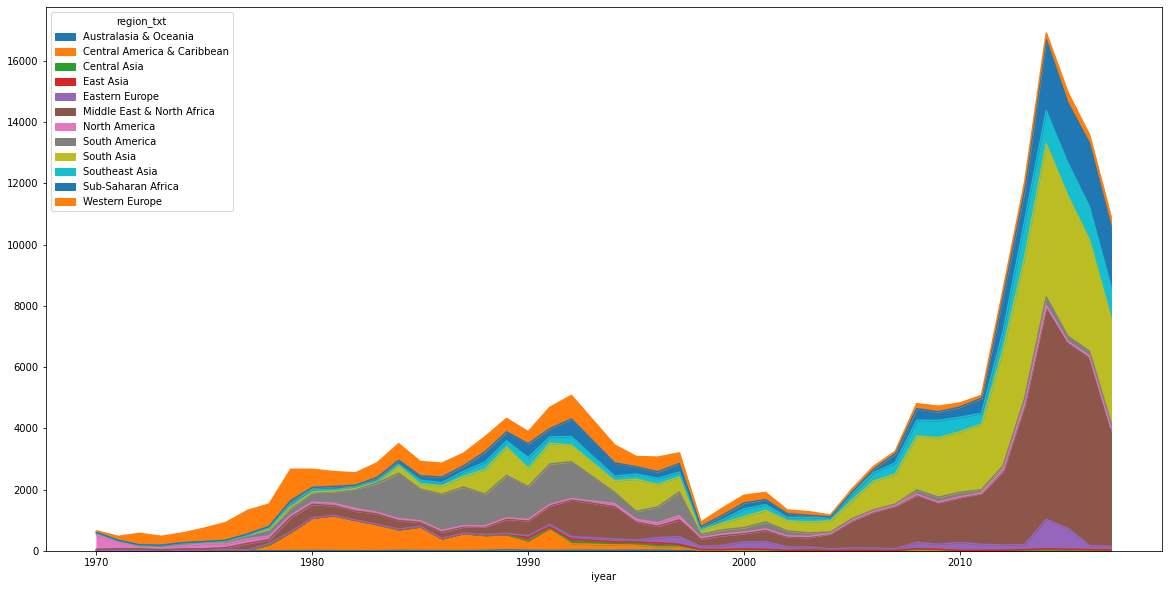

In [22]:
## Graphical representation of terrorist activities by region
pd.crosstab(df.iyear,df.region_txt).plot(kind='area',figsize=(20,10))
plt.show()

Getting count of the attacks

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



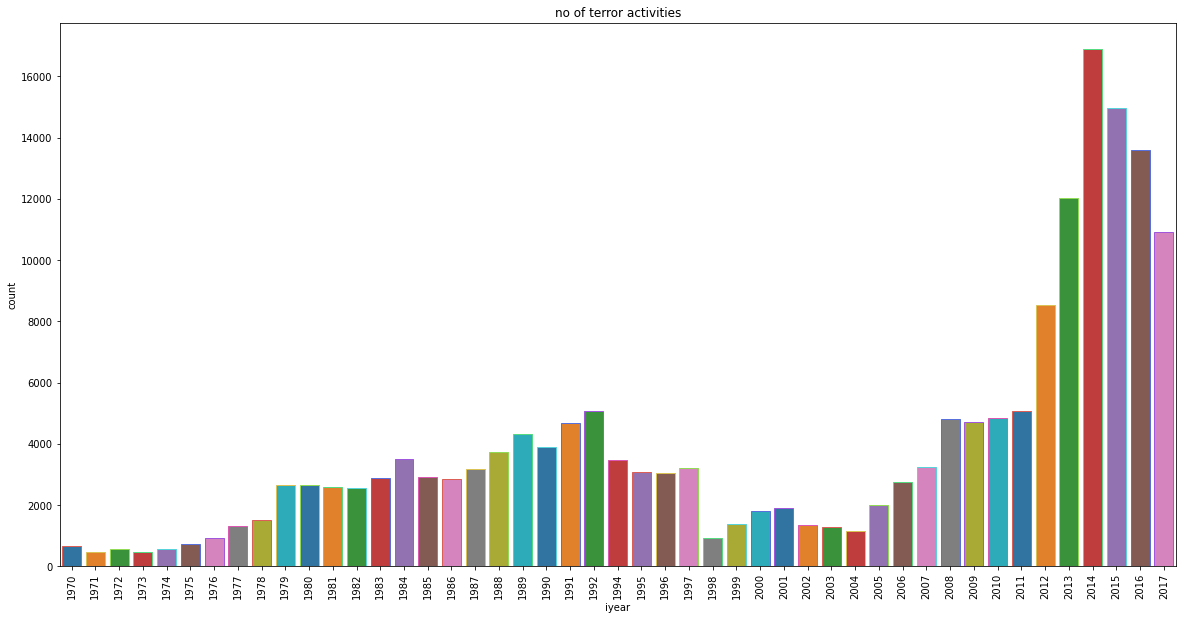

In [23]:
plt.subplots(figsize=(20,10))
sns.countplot('iyear',data=df,palette='tab10',edgecolor=sns.color_palette("hls", 8))
plt.xticks(rotation=90)
plt.title('no of terror activities')
plt.show()

Highest number of attacks took place in the year 2014.

In [26]:
year = df.iyear.value_counts().to_dict()
rate = ((year[2017]-year[1970])/year[2017])*100
print('The number of attacks in the year 2017 is',year[2017],' and the number of attacks in the year 1970 is',year[1970])

The number of attacks in the year 2017 is 10900  and the number of attacks in the year 1970 is 651


From this we can say that the there has been a significant increase in the number of attacks from 1970 to 2017. Now, let's see the type of attack that has been used the most.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



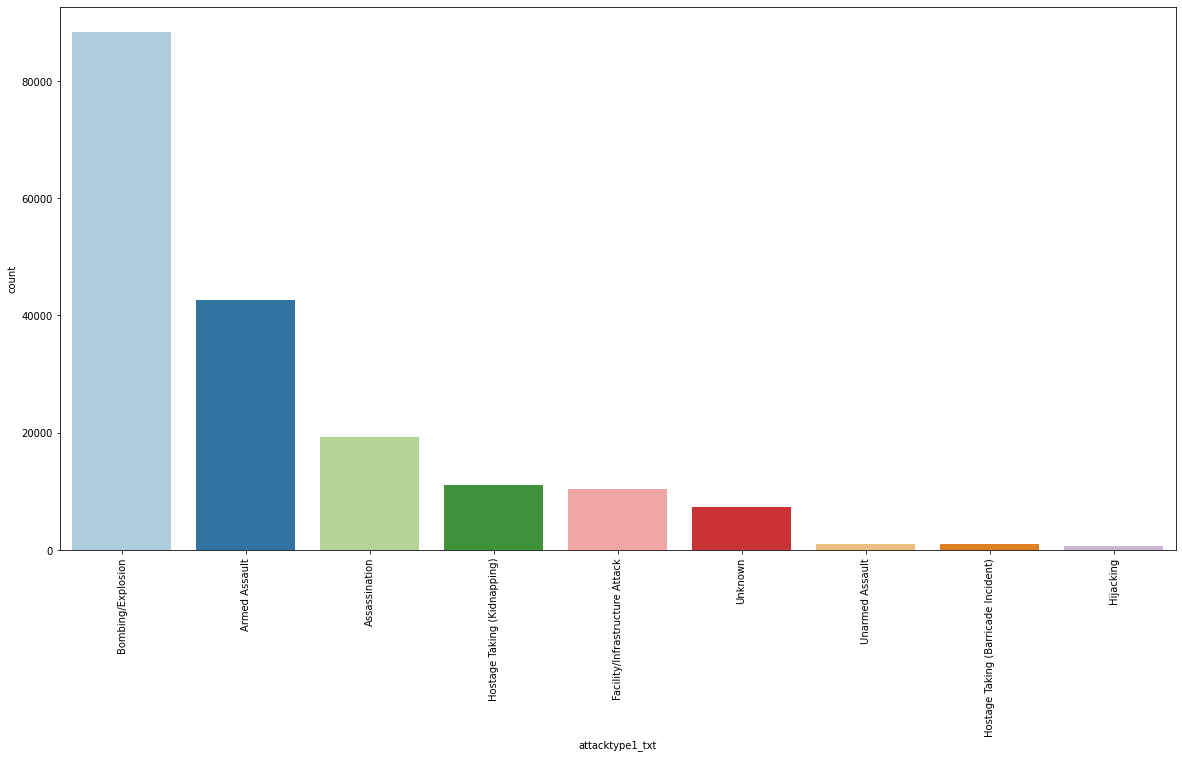

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(df['attacktype1_txt'],order=df['attacktype1_txt'].value_counts().index,palette='Paired')
plt.xticks(rotation=90)
plt.show()

From this we can say that Bombing/Explosion have been used the most i.e.; more than 80000 times.

Now let's look at the type of places that have been targeted the most.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



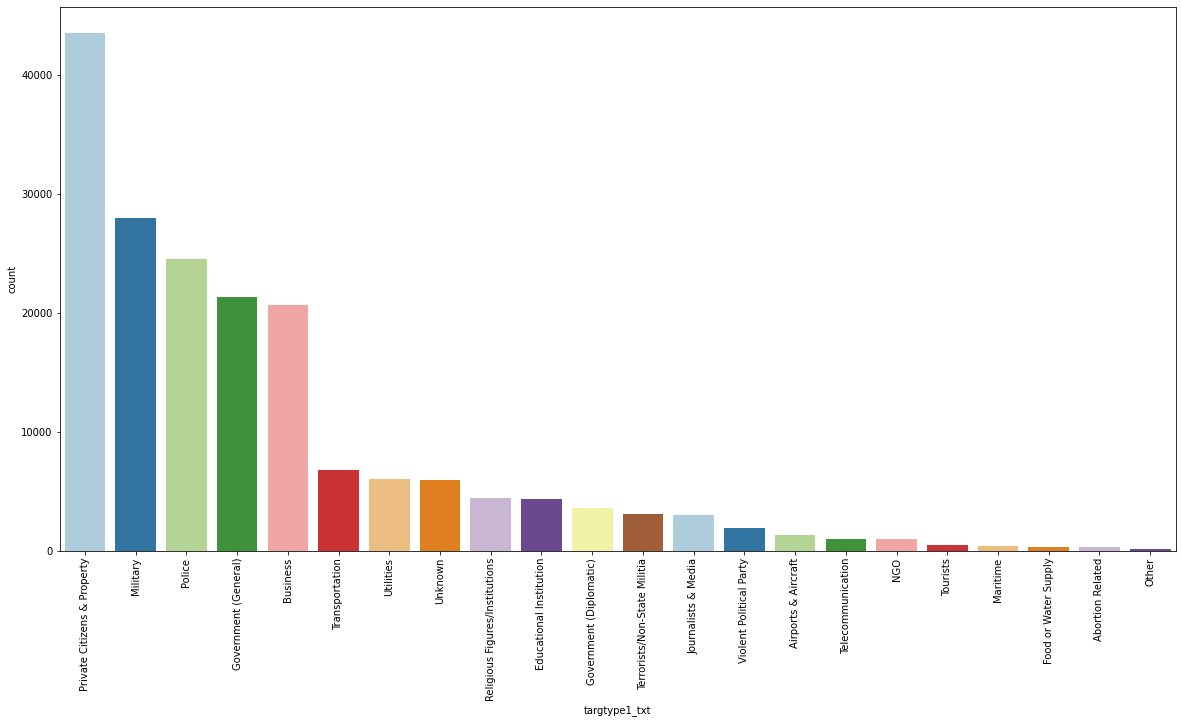

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(df['targtype1_txt'],order=df['targtype1_txt'].value_counts().index,palette='Paired')
plt.xticks(rotation=90)
plt.show()

Therefore, private citizens & property has been targeted the most i.e; more than 40000 time.



Now, let's look at the countries that are the most under attack.

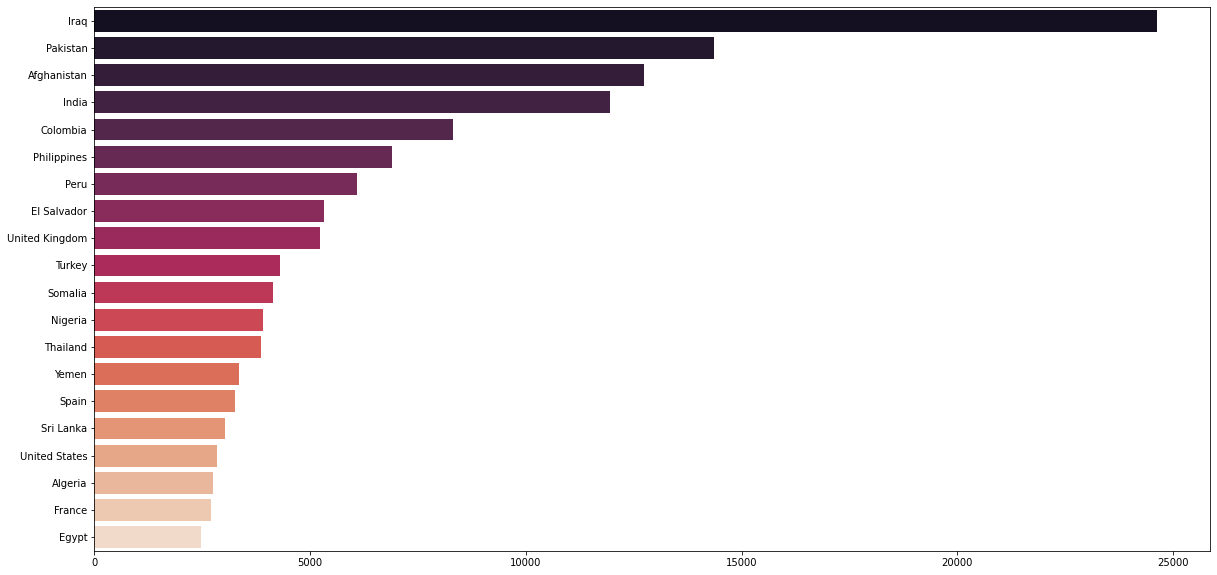

In [29]:
fig,axes=plt.subplots(figsize=(20,10),nrows=1,ncols=1)
sns.barplot(x=df['country_txt'].value_counts()[:20].values,y=df['country_txt'].value_counts()[:20].index,palette='rocket')

Therefore the country that faces most number of terror attacks is Iraq i.e; about 25000.

Now, let's look at the regions that are the most under attack.

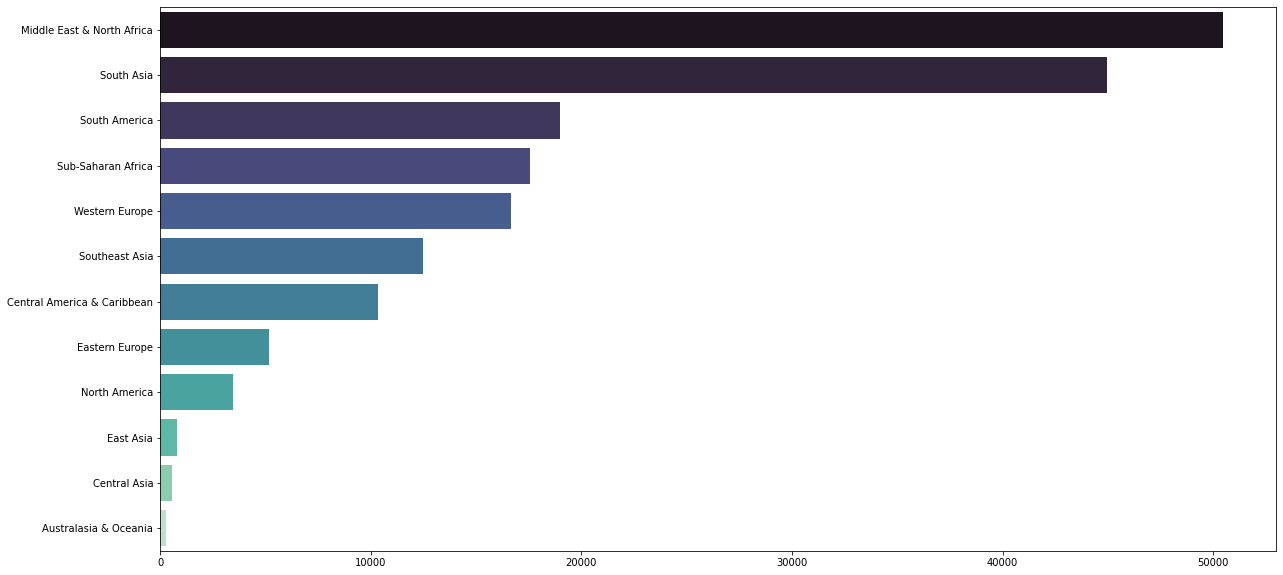

In [30]:
fig,axes=plt.subplots(figsize=(20,10),nrows=1,ncols=1)
sns.barplot(x=df['region_txt'].value_counts()[:20].values,y=df['region_txt'].value_counts()[:20].index,palette='mako')

Therefore, the region that is most under attack is Middle East and North Africa with more than 50000 attacks.

## ANALYSIS ON CUSTOMIZED DATA

Terror attacks in a location/country in a particular year.

In [31]:
filterYear = df['iyear'] == 1970

In [32]:
filterData=df[filterYear]

In [33]:
filterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 691.7+ KB


In [34]:
reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData=reqFilterData.dropna() #remove null values

In [35]:
reqFilterDataList=reqFilterData.values.tolist()

In [36]:
map=folium.Map(location=[0,30],tiles='CartoDB positron',zoom_start=2)

In [38]:
## Clustered marker
markerCluster= folium.plugins.MarkerCluster().add_to(map)
for point in range (0, len(reqFilterDataList)):
  folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],popup=reqFilterDataList[point][0]).add_to(map)

In [39]:
map

Total number of people killed in terror attacks.

In [40]:
killData=df.loc[:,'nkill']
killData=killData.dropna() #remove null values

In [41]:
print('Number of people killed in terror attacks',int(sum(killData)))

Number of people killed in terror attacks 411868


Conclusion: 

*   Highest number of attacks took place in year 2014.
*   Number of attacks in year 2017 is 10900 and number of attacks in year 1970 is 651.
*   Bombing/Explosion have been used the most.
*   Private citizens & property has been targeted the most.
*   The country that faces most number of terror attacks is Iraq i.e; about 25000.
*   The region that is most under attack is Middle East and North Africa with more than 50000 attacks.
*   Number of people killed in terror attacks 411868.




